### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임


In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
y_target = boston_df.PRICE
X_data = boston_df.drop('PRICE',axis = 1)

rf = RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores = cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'개별 nms : {np.round(neg_mse_scores,2)}')
print(f'개별 rmse : {np.round(rmse_scores,2)}')
print(f'평균 rmse = {avg_rmse:.2f}')

개별 nms : [ -7.88 -13.14 -20.57 -46.23 -18.88]
개별 rmse : [2.81 3.63 4.54 6.8  4.34]
평균 rmse = 4.42


In [5]:
def model_cross_val_score(model,X_data,y_target):
    neg_mse_scores = cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(f'모델 : {model}')
    print(f'개별 nms : {np.round(neg_mse_scores,2)}')
    print(f'개별 rmse : {np.round(rmse_scores,2)}')
    print(f'평균 rmse = {avg_rmse:.2f}')

from xgboost import XGBRegressor
xgbr = XGBRegressor(random_state=0,n_estimators=1000)
model_cross_val_score(xgbr,X_data,y_target)

모델 : XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
개별 nms : [ -9.17 -13.74 -13.95 -41.76 -18.69]
개별 rmse : [3.03 3.71 3.73 6.46 4.32]
평균 rmse = 4.25


In [8]:
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
dtr = DecisionTreeRegressor(random_state=0)
lgbmr = LGBMRegressor(random_state=0,n_estimators=1000)

model_cross_val_score(dtr,X_data,y_target)
print()
model_cross_val_score(lgbmr,X_data,y_target)

모델 : DecisionTreeRegressor(random_state=0)
개별 nms : [-11.89 -34.89 -28.17 -54.44 -52.59]
개별 rmse : [3.45 5.91 5.31 7.38 7.25]
평균 rmse = 5.86

모델 : LGBMRegressor(n_estimators=1000, random_state=0)
개별 nms : [ -8.96 -18.58 -17.05 -43.71 -26.92]
개별 rmse : [2.99 4.31 4.13 6.61 5.19]
평균 rmse = 4.65


<AxesSubplot:>

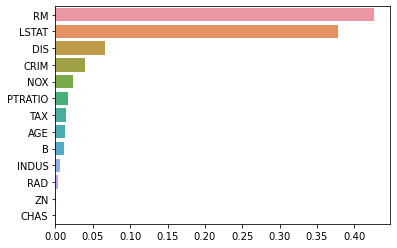

In [10]:
import seaborn as sns

rf = RandomForestRegressor(random_state=0,n_estimators=1000)
rf.fit(X_data,y_target)

feature_series = pd.Series(data=rf.feature_importances_,index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(feature_series,feature_series.index)


(100, 2)


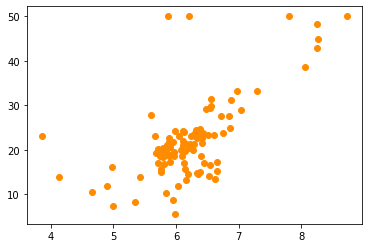

In [11]:
import matplotlib.pyplot as plt

boston_sample = boston_df[['RM','PRICE']]
boston_sample = boston_sample.sample(n=100,random_state=0)
print(boston_sample.shape)
plt.figure()
plt.scatter(boston_sample.RM,boston_sample.PRICE,c='darkorange')

In [12]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

# 테스트용 데이터 셋 : 4.5 ~ 8.5 사이 100개
X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature = boston_sample['RM'].values.reshape(-1,1)
y_target = boston_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature,y_target)
dt_reg2.fit(X_feature,y_target)
dt_reg7.fit(X_feature,y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

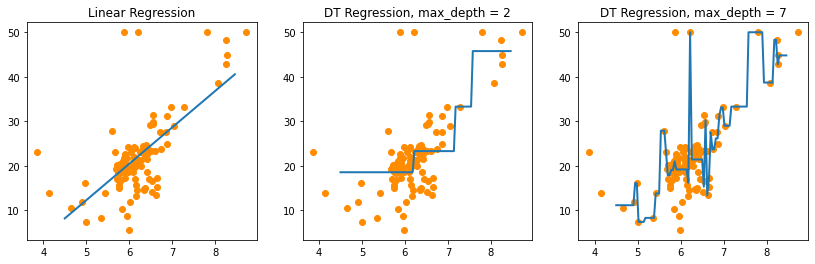

In [14]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(14,4),ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(boston_sample.RM,boston_sample.PRICE,c='darkorange')
ax1.plot(X_test,pred_lr,label='linear',linewidth=2)

ax2.set_title('DT Regression, max_depth = 2')
ax2.scatter(boston_sample.RM,boston_sample.PRICE,c='darkorange')
ax2.plot(X_test,pred_dt2,label='max_depth : 2',linewidth=2)

ax3.set_title('DT Regression, max_depth = 7')
ax3.scatter(boston_sample.RM,boston_sample.PRICE,c='darkorange')
ax3.plot(X_test,pred_dt7,label='max_depth : 7',linewidth=2)